In [1]:
import pandas as pd
import numpy as np
from numpy import random
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import re
import random

import json

import csv
import torch

import math
import scipy as scp
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
SEED = 123
DEVICE = "cuda"
ly = pd.read_csv("4_19_lyrics_with_tags.csv", dtype = {'lyrics':str, 'category':int})
size = range(len(ly['lyrics'])) #77,885 songs
## CSV IS BAD NEED TO SET VALUES FOR CAT
## Pretend this is an additional column as it maps lyrics: song
categories = []
for i in size:
  gen = ly['tags'][i]
  if gen == "others":
    categories.append(0)
  elif gen == "rock":
    categories.append(1)
  elif gen == "pop":
    categories.append(2)
  elif gen == "indie":
    categories.append(3)
  elif gen == "alternative":
    categories.append(4)
  elif gen == "dance":
    categories.append(5)

print(categories[:100])


[2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 3, 0, 2, 1, 5, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 5, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 4, 2, 1, 2, 1, 1, 4, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 4, 1]


In [0]:
STOPWORDS = set(stopwords.words('english'))
lyrics = []
#print(len(ly['lyrics']))

# Cleans out non-ASCII chars, then cleans up new line
for i in size:
  lyrics.append(re.sub('[^a-z \'\n]', '', ly['lyrics'][i].lower()))
  lyrics[i] = re.sub('\n', ' ', lyrics[i])  


In [4]:
## This modified block creates a balanced lyrics_matrix
g_cnt = [0, 0, 0, 0, 0, 0]
lyr_mat = []
maxSentenceLen = 200
maxGen = 1600
giant_lyrics_str = "" # Used to make word cloud
vocab = []
index_store = [] # used later, stores locations of lyrics
print(lyrics[:1])
# Find out the largest sentence and create a vocabulary
for i in size:
	list = lyrics[i].split(' ')
	c = categories[i]
	c_cnt = g_cnt[c]
	if c_cnt < maxGen:       
		lyr_mat.append(list[:maxSentenceLen])
		g_cnt[c] += 1
		index_store.append(i)
		for j in list:
			if j not in STOPWORDS:
				vocab.append(j)
				giant_lyrics_str += (j + " ")
        

print(len(lyr_mat[0]))
size = range(len(index_store))
print(size)


["i had come in the name of love with a mission to fulfill i will reach where justice won't now it's time to pay the bill i'm sisters law i'm sisters law i'm  with a loaded gun are you ready ready to face your crime don't forgive never blame yourself you've got the right to live your life so every woman with a stolen pride come to me and point him out i'm sisters law i'm sisters law i'm  with a loaded gun are you ready ready to face your crime i'm sister law and i've come to you i'm sister law i've got my aim on you i'm  with a loaded gun are you ready ready ready ready so you regret it all it was not your foult you say she was asking for it and i say a woman's gotta do what a woman's gotta do what's the matter with you ain't i good enough say your prayers cold as ice feeling no mercy   frozen eyes the sound of bullet   i'm sisters law i'm sisters law i'm  with a loaded gun are you ready ready to face your crime i'm sister law and i've come to you i'm sister law i've got my aim on you 

In [5]:
print(len(lyr_mat[2]))

119


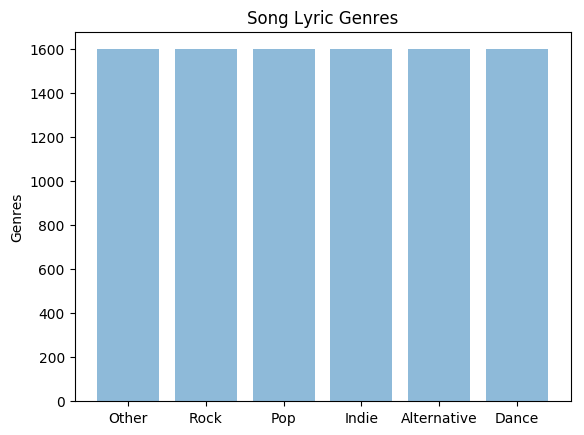

In [6]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

gen_names = ('Other', 'Rock', 'Pop', 'Indie', 'Alternative', 'Dance')
y_pos = np.arange(len(gen_names))
# use tot_genre as y

plt.bar(y_pos, g_cnt, align='center', alpha=0.5)
plt.xticks(y_pos, gen_names)
plt.ylabel('Genres')
plt.title('Song Lyric Genres')

plt.show()

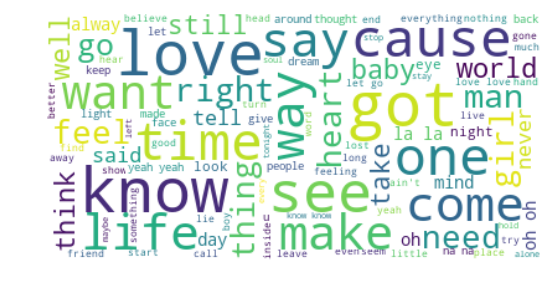

In [7]:

from wordcloud import WordCloud
comment_words = ' '

    
# Create word generator
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(giant_lyrics_str)
# Display most common words
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
# Create a dictionary of the most common words

from collections import Counter
count = Counter(vocab)

# Needed to add a plus one and del statement since the most common word will be ''
MAX_VOCAB = 25000 # Constant for limiting number of entries
most_common_words = count.most_common(MAX_VOCAB + 1)
del most_common_words[0]

MAX_VOCAB = len(most_common_words)
# Maps unique word to an index
cleaned_dict = {}
index = 1
for i in range(MAX_VOCAB):
  cleaned_dict.update({most_common_words[i][0] : index})
  index += 1
  
print(cleaned_dict)


{"i'm": 1, 'love': 2, 'know': 3, 'like': 4, 'oh': 5, 'got': 6, 'get': 7, 'go': 8, 'time': 9, 'one': 10, 'baby': 11, 'see': 12, 'come': 13, 'never': 14, "can't": 15, 'yeah': 16, 'want': 17, 'make': 18, 'way': 19, 'say': 20, 'take': 21, 'let': 22, 'back': 23, 'feel': 24, "i'll": 25, 'wanna': 26, 'away': 27, 'gonna': 28, 'need': 29, 'life': 30, "i've": 31, 'right': 32, "'cause": 33, 'could': 34, 'tell': 35, 'heart': 36, 'night': 37, 'give': 38, 'day': 39, 'think': 40, "there's": 41, 'girl': 42, 'man': 43, 'good': 44, 'keep': 45, "that's": 46, 'world': 47, 'still': 48, 'us': 49, "ain't": 50, 'around': 51, 'eyes': 52, 'would': 53, 'little': 54, 'mind': 55, 'said': 56, 'well': 57, "we're": 58, 'always': 59, 'every': 60, 'long': 61, 'look': 62, 'la': 63, 'find': 64, 'home': 65, 'things': 66, 'ever': 67, 'nothing': 68, 'hey': 69, 'hear': 70, 'gotta': 71, 'better': 72, 'stop': 73, 'try': 74, 'gone': 75, 'something': 76, 'tonight': 77, 'hold': 78, 'put': 79, 'much': 80, 'really': 81, 'leave': 82

In [9]:
# One hot matrix - I made this but didn't execute this cell in this run because this crashes google colab

"""
hot_mat = []
for i in size:
  list = [0 for _ in range(MAX_VOCAB + 3)]
  
  for j in range(len(lyr_mat[i])):
    val = cleaned_dict.get(lyr_mat[i][j])
    # Make sure we're not using unknown as a value
    val = val if val is not None else unknown
    list[val] = 1
  
  if len(lyr_mat[i]) < maxSentenceLen:
    list[padding] = 1
    
  hot_mat.append(list)    """

"\nhot_mat = []\nfor i in size:\n  list = [0 for _ in range(MAX_VOCAB + 3)]\n  \n  for j in range(len(lyr_mat[i])):\n    val = cleaned_dict.get(lyr_mat[i][j])\n    # Make sure we're not using unknown as a value\n    val = val if val is not None else unknown\n    list[val] = 1\n  \n  if len(lyr_mat[i]) < maxSentenceLen:\n    list[padding] = 1\n    \n  hot_mat.append(list)    "

In [0]:
# Clean up lyr_mat
# (strange code, had to optimize for performance)
unknown = MAX_VOCAB + 1
padding = MAX_VOCAB + 2
for i in size:
  currLen = len(lyr_mat[i])
  j = 0
  while j < len(lyr_mat[i]) and j < maxSentenceLen:
    val = cleaned_dict.get(lyr_mat[i][j])
    lyr_mat[i][j] = val if val is not None else unknown
    j += 1
    
  # Pad the rest if current lyric is shorter than maxSentenceLen
  while j < maxSentenceLen:
    lyr_mat[i].append(padding)
    j += 1
    



In [11]:
print(lyr_mat[:50])

[[25001, 25001, 13, 25001, 25001, 133, 25001, 2, 25001, 25001, 1355, 25001, 3048, 25001, 25001, 413, 25001, 2519, 25001, 25001, 25001, 9, 25001, 379, 25001, 1753, 1, 1838, 1146, 1, 1838, 1146, 1, 25001, 25001, 25001, 2083, 475, 25001, 25001, 229, 229, 25001, 95, 25001, 1007, 25001, 841, 14, 482, 25001, 25001, 6, 25001, 32, 25001, 103, 25001, 30, 25001, 60, 375, 25001, 25001, 3049, 662, 13, 25001, 25001, 25001, 751, 25001, 25001, 1, 1838, 1146, 1, 1838, 1146, 1, 25001, 25001, 25001, 2083, 475, 25001, 25001, 229, 229, 25001, 95, 25001, 1007, 1, 831, 1146, 25001, 31, 13, 25001, 25001, 1, 831, 1146, 31, 6, 25001, 1839, 25001, 25001, 1, 25001, 25001, 25001, 2083, 475, 25001, 25001, 229, 229, 229, 229, 25001, 25001, 983, 25001, 25001, 25001, 25001, 25001, 25001, 23076, 25001, 20, 25001, 25001, 1136, 25001, 25001, 25001, 25001, 20, 25001, 3514, 71, 25001, 25001, 25001, 3514, 71, 25001, 149, 25001, 241, 25001, 25001, 50, 25001, 44, 144, 20, 25001, 2482, 203, 25001, 700, 126, 25001, 833, 25001,

In [12]:
# Create a combined_dict with title, category keys
# that dict gets appended into the data list
data_list = []

for i in size:
  combined_dict = {"text": None, "label": None}
  combined_dict["text"] = lyr_mat[i]
  combined_dict["label"] = categories[index_store[i]]
  data_list.append(combined_dict)
  
print(data_list[:2])

cats = [0,1,2,3,4,5]
num_cats = len(cats)
print(num_cats)
# size 77885
# data_list
# padding = 25002

[{'text': [25001, 25001, 13, 25001, 25001, 133, 25001, 2, 25001, 25001, 1355, 25001, 3048, 25001, 25001, 413, 25001, 2519, 25001, 25001, 25001, 9, 25001, 379, 25001, 1753, 1, 1838, 1146, 1, 1838, 1146, 1, 25001, 25001, 25001, 2083, 475, 25001, 25001, 229, 229, 25001, 95, 25001, 1007, 25001, 841, 14, 482, 25001, 25001, 6, 25001, 32, 25001, 103, 25001, 30, 25001, 60, 375, 25001, 25001, 3049, 662, 13, 25001, 25001, 25001, 751, 25001, 25001, 1, 1838, 1146, 1, 1838, 1146, 1, 25001, 25001, 25001, 2083, 475, 25001, 25001, 229, 229, 25001, 95, 25001, 1007, 1, 831, 1146, 25001, 31, 13, 25001, 25001, 1, 831, 1146, 31, 6, 25001, 1839, 25001, 25001, 1, 25001, 25001, 25001, 2083, 475, 25001, 25001, 229, 229, 229, 229, 25001, 25001, 983, 25001, 25001, 25001, 25001, 25001, 25001, 23076, 25001, 20, 25001, 25001, 1136, 25001, 25001, 25001, 25001, 20, 25001, 3514, 71, 25001, 25001, 25001, 3514, 71, 25001, 149, 25001, 241, 25001, 25001, 50, 25001, 44, 144, 20, 25001, 2482, 203, 25001, 700, 126, 25001, 83

In [0]:
#Shuffle our data

random.seed(SEED)
random.shuffle(data_list)

# Split data into train and test set
split_size = math.floor(len(data_list) * 0.5)
#print(split_size)

train_set = []
for i in range(split_size):
  train_set.append(data_list[i])
  
test_set = []
for i in range(split_size, len(data_list)):
  test_set.append(data_list[i])

# Verify size = total size
#print(len(test_set) + len(train_set))
  
# Now split train_set into valid_set with a 70/30 ratio
split_size = math.floor(len(train_set) * 0.3)

#print(split_size)
valid_set = []
for i in range(split_size):
  valid_set.append(train_set.pop(i))

# Verify size = test size
#print(len(train_set) + len(valid_set))        

In [0]:
#for i in size:
test_file = 'balanced_test_data.json'
valid_file = 'balanced_valid_data.json'
train_file = 'balanced_train_data.json'

with open(test_file, 'w+') as outfile:  
    for i in range(len(test_set)):
      data = test_set[i]
      json.dump(data, outfile)
      outfile.write('\n')
    
with open(valid_file, 'w+') as outfile:  
    for i in range(len(valid_set)):
      data = valid_set[i]
      json.dump(data, outfile)
      outfile.write('\n')
    
with open(train_file, 'w+') as outfile:  
    for i in range(len(train_set)):
      data = train_set[i]
      json.dump(data, outfile)
      outfile.write('\n')
  
from google.colab import files
files.download(test_file)
files.download(valid_file)
files.download(train_file)


In [15]:
# Read in json file here
from torchtext import data

TEXT = data.Field()
LABEL = data.LabelField()

# Define fields
fields = {'text': ('text', TEXT), 'label': ('label', LABEL)}
print(fields)

{'text': ('text', <torchtext.data.field.Field object at 0x7ff5ea0179b0>), 'label': ('label', <torchtext.data.field.LabelField object at 0x7ff5ea017828>)}


In [16]:
train_set, valid_set,test_set = data.TabularDataset.splits(
                                        path = "./",
                                        train = train_file,
                                        validation = valid_file,
                                        test = test_file,
                                        format = 'json',
                                        fields = fields
)

print(vars(train_set[0]))

{'text': [108, 25001, 45, 25001, 1352, 970, 25001, 17239, 1654, 1320, 25001, 25001, 54, 6249, 25001, 209, 25001, 349, 25001, 1485, 25001, 3951, 25001, 54, 25001, 25001, 1795, 1164, 25001, 8785, 25001, 25001, 2507, 175, 1659, 25001, 25001, 1251, 367, 39, 25001, 115, 25001, 1069, 25001, 25001, 21, 25001, 25001, 25001, 14171, 3095, 195, 3734, 25001, 147, 25001, 12, 25001, 2859, 4199, 619, 252, 25001, 25001, 139, 15318, 25001, 108, 25001, 45, 25001, 17043, 110, 25001, 7, 124, 165, 25001, 25001, 72, 4585, 25001, 25001, 332, 25001, 3622, 1673, 25001, 108, 25001, 45, 25001, 1597, 280, 25001, 1462, 11887, 2, 25001, 1603, 25001, 2560, 11454, 25001, 1464, 2585, 3103, 305, 25001, 25001, 21, 25001, 25001, 25001, 14171, 3095, 195, 3734, 25001, 147, 25001, 12, 25001, 2859, 4199, 619, 252, 25001, 25001, 139, 15318, 25001, 108, 25001, 45, 25001, 1352, 970, 25001, 17239, 1654, 1320, 25001, 25001, 54, 6249, 25001, 209, 25001, 349, 25001, 1485, 25002, 25002, 25002, 25002, 25002, 25002, 25002, 25002, 2500

In [0]:
TEXT.build_vocab(train_set)
LABEL.build_vocab(train_set)

In [0]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_set, valid_set, test_set), 
    batch_size = BATCH_SIZE,
    #What is sort_key???
    sort_key = lambda x: x.text,
    device = device)

In [0]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        
        self.rnn = nn.RNN(embedding_dim, hidden_dim)
        
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text):

        #text = [sent len, batch size]
        
        embedded = self.embedding(text)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.rnn(embedded)
        
        #output = [sent len, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        
        return self.fc(hidden.squeeze(0))

In [0]:
INPUT_DIM = MAX_VOCAB + 3 # account for u and p values
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 6

model = RNN(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [21]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 2,593,490 trainable parameters


In [0]:
optimizer = optim.Adam(model.parameters())

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)


In [0]:
#Altered to multiclass
def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch
    """
    max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [0]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.text)
        
        loss = criterion(predictions, batch.label)
        
        acc = categorical_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [0]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.text)
            
            loss = criterion(predictions, batch.label)
            
            acc = categorical_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [0]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [27]:
N_EPOCHS = 5
#N_EPOCHS = 25   # IMPLEMENT THIS LINE FOR THE OTHER, BALANCED RNN MODEL 

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 2m 26s
	Train Loss: 1.810 | Train Acc: 17.78%
	 Val. Loss: 1.800 |  Val. Acc: 19.43%
Epoch: 02 | Epoch Time: 1m 37s
	Train Loss: 1.745 | Train Acc: 23.67%
	 Val. Loss: 1.805 |  Val. Acc: 20.11%
Epoch: 03 | Epoch Time: 0m 23s
	Train Loss: 1.692 | Train Acc: 29.13%
	 Val. Loss: 1.870 |  Val. Acc: 18.21%
Epoch: 04 | Epoch Time: 0m 16s
	Train Loss: 1.621 | Train Acc: 31.13%
	 Val. Loss: 1.899 |  Val. Acc: 19.97%
Epoch: 05 | Epoch Time: 1m 16s
	Train Loss: 1.796 | Train Acc: 20.11%
	 Val. Loss: 1.809 |  Val. Acc: 17.87%


In [28]:
test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 1.801 | Test Acc: 18.71%
